# Optical Communications Project -- Team 8

In [1]:
# fibre specification
n1 = 1.46
n2 = 1.45
lambda_ = 820e-9
a = 5.1e-6

In [2]:
#import relevant packages
import numpy as np
import matplotlib.pyplot as plt

## 1. Calculate the V-parameter for the fibre.

In [3]:
V = 2*np.pi*a/lambda_*np.sqrt(n1*n1-n2*n2)
print(V)

6.666266729164944


## 2. Decide whether you are going to consider the {TE, TM, EH, HE} or LP modes for all of the subsequent tasks.


[3.31294017] [5.92632125]


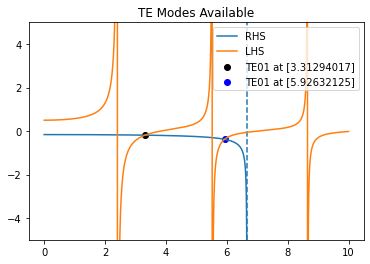

In [14]:
#Choosing TE Modes: 
def LHSTETM(pa):
    a= ss.jv(1, pa)/ss.jv(0,pa)
    return a/pa
    
def RHSTE(pa):
    qa=np.sqrt(V**2-pa**2)
    a= -ss.kn(1, qa)/ss.kn(0,qa)
    return a/qa

def f(pa):

   return LHSTETM(pa)-RHSTE(pa)

def pros(LHS, RHS,f,  g1=1, g2=5):
   ymax=5
   ymin=-5
   x=np.linspace(0, 10, 5000)
#plt.vlines(x[RHS(x).argmax], -5, 5)
   plt.plot(x, RHS(x), label="RHS")
   plt.plot(x, LHS(x), label="LHS")
   sol=sp.optimize.root(f, g1)
   sol2=sp.optimize.root(f, g2)
   plt.scatter(sol.x, RHS(sol.x), color='k', label="TE01 at "+ str(sol.x))
   plt.scatter(sol2.x, LHS(sol2.x), color='b', label="TE01 at "+ str(sol2.x))
   print(sol.x, sol2.x)
   plt.legend()
   plt.ylim(-5, 5)
   plt.vlines(V, -5, 5, linestyle='--')


#TE and TM modes

pros(LHSTETM, RHSTE,f, 4.5, 6.2)
plt.title("TE Modes Available")
plt.show()

## 3. Identify all the modes that the fibre supports and the propagation constant and effective index for each mode. Summarise the results as a table.

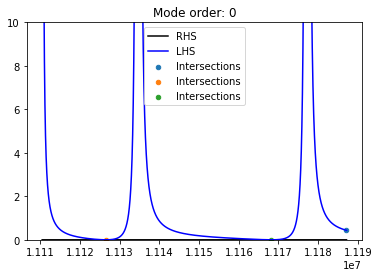

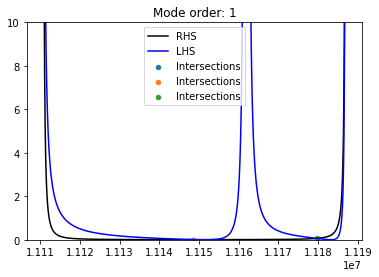

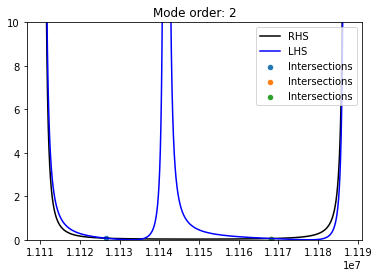

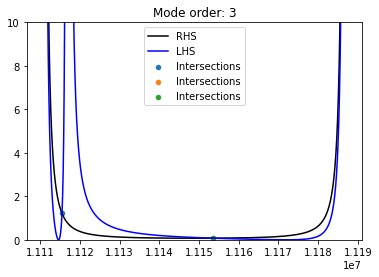

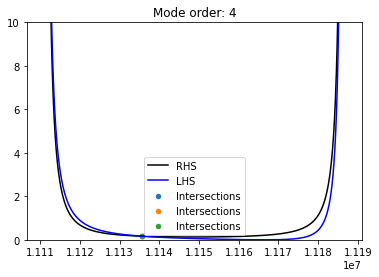

[[[11186912.582786862, 11126545.156329866, 11168205.83707045], [0.3596219368533624, 5.930004594720767, 3.3176029391531756], array([1.459971  , 1.45209262, 1.45752963])], [[11148568.222154344, 11148568.222172938, 11179639.569973007], [4.733426384533129, 4.733426383393997, 2.0881648379135602], array([1.45496679, 1.45496679, 1.45902182])], [[11126554.185492871, 11168222.5032219, 11168222.503229521], [5.9295639288017, 3.31614335026672, 3.3161433495991077], array([1.4520938 , 1.45753181, 1.45753181])], [[11115505.675996805, 11153425.010944858, 11153425.010944983], [6.446042790055592, 4.425836004398479, 4.425836004390307], array([1.45065189, 1.45560063, 1.45560063])], [[11135639.69752213, 11135639.697522389, 11135639.69751514], [5.4679846893600486, 5.467984689346336, 5.4679846897303355], array([1.45327952, 1.45327952, 1.45327952])]]


In [12]:

def j(pa, m):
    u=-ss.jv(m+1, pa)+m*ss.jv(m, pa)/pa
    l=pa*ss.jv(m, pa)
    return u/l   #first order bessel function terms 

def k(qa, m):
    u=-ss.kn(m+1, qa)+m*ss.kn(m, qa)/qa 
    l= qa*ss.kn(m, qa)
    return u/l #Second order bessel terms

def b(pa): #Convert between pa values and Wavenumber 
    p=pa/a
    b=np.sqrt((n1*k0)**2-p**2)
    return b

def pa(b): #Convert between Wavenumber and pa values
    p=np.sqrt((n1*k0)**2-b**2)
    return p*a

def lhs(b, m): # LHS of quadratic solution
    pa=np.sqrt((n1*k0)**2-b**2)*a
    qa=np.sqrt(b**2-(n2*k0)**2)*a
    t1=(j(pa, m)+k(qa, m))
    t2=(j(pa, m)+n2**2*k(qa, m)/n1**2)

    return t1*t2

def rhs(b, m):# RHS of quadratic solution
    pa=np.sqrt((n1*k0)**2-b**2)*a
    qa=np.sqrt(b**2-(n2*k0)**2)*a
    t1=(1/(pa)**2+1/(qa)**2)
    t2=(1/(pa)**2+n2**2/(n1*qa)**2)
    return m**2*t1*t2 

def f(b):#Optimisation function
   return lhs(b, m1)-rhs(b, m1)

global m1

LHS=[]
RHS=[]
btest=np.linspace(n2*k0,n1*k0, 10000) #Potential b-values within constraints
mi=[0, 1, 2, 3, 4]
solfull=[]

for m in mi:
    m1=m
    LHS=[]
    RHS=[]
    paVals=[]
    for b in btest: #Iterate through potential b values
        
        LHS.append(lhs(b, m))
        RHS.append(rhs(b, m))
    sol=sp.optimize.root(f, btest[20])
    sol3=sp.optimize.root(f, btest[int(len(btest)/2)])
    sol2=sp.optimize.root(f, btest[-30])
    solutions=list(set([sol.x[0], sol2.x[0], sol3.x[0]]))
    for s in solutions:
        plt.scatter(s,lhs(s, m), label="Intersections", s=20 )
        paVals.append(pa(s))
    
    solfull.append([solutions, paVals, np.array(solutions)/k0])
    plt.plot(btest, RHS, 'k', label="RHS")
    plt.plot(btest, LHS, 'b', label="LHS")
    plt.ylim(0, 10)
    plt.legend()
    plt.title("Mode order: "+str(m))
    plt.show()
    
print(solfull)

## 4. Excluding the fundamental mode {HE11/LP01}, pick one of the modes from your table for the tasks below.


## 5. Plot maps in the plane perpendicular to the fibre axis of the amplitude of all three E-fields within the fibre. You will need to fix one of the A or B parameters, e.g. to unity, and use the relevant equations to calculate the other values. You can choose to do this for either the {radial, tangential, z} or {x, y, z} E-field components.


## 6. Plot the spatial distribution of the total intensity of the mode in the direction perpendicular to the fibre axis, e.g. sum of the square modulus of the field in the {radial, tangential} or {x, y} directions.

## 7. Calculate numerically the waveguide dispersion $ 𝐷_w = − \frac{\lambda}{c} [\frac{\partial^2n_{eff}}{\partial\lambda^2}]_w = − \frac{\lambda}{c} [\frac{\partial^2n_{m}}{\partial\lambda^2}]_w $ for the mode selected, see notes for lecture 6. For example, calculate this from the effective index calculated for three (or more) wavelengths close to the wavelength of light to be transmitted.

## 8. Using your result to part 6, calculate the fraction of energy in the core and cladding by summing over the relevant regions. Use equation $𝑛^2_{eff} \approx 𝑛^2_1\Gamma(𝑉) + 𝑛^2_2(1 − \Gamma(𝑉)) $ to calculate an approximate value for the effective index. Compare this value of the effective index to the value you calculated directly and comment on your result.